In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# **Hoeffding Inequality in a Validation Setup**

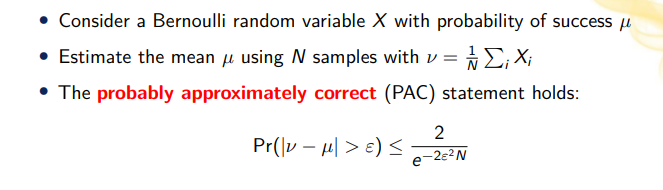

##Hoeffding’s inequality tells us how likely it is that the average of random samples deviates from the true mean.

##**Example**
##Imagine you flip a biased coin with an unknown probability 𝑝 of heads.
##You flip it 𝑛 times and compute the sample mean (fraction of heads).
##Hoeffding’s inequality tells you:

##The probability that this sample mean is far from the true mean 𝑝 decreases exponentially with n.

##**Below is a visual demonstration of the interpreation of Hoeffding inequality when we vary the number of samples and the error rate.**

In [ ]:
# =======================================
#  Hoeffding Inequality Demonstration
#  (Equation: Pr(|ν - μ| > ε) ≤ 2 e^{-2ε²N})
# =======================================



def hoeffding_equation_demo(N=100, epsilon=0.1, seed=42):
    """
    Demonstrates Hoeffding's inequality:
        Pr(|ν - μ| > ε) ≤ 2 e^{-2ε²N}
    where:
      ν = empirical mean from N Bernoulli samples
      μ = true mean (expected value)
    """
    np.random.seed(seed)
    mu = 0.5               # true mean (probability of success)
    trials = 10000         # number of independent experiments

    # Generate Bernoulli samples: each trial = N flips of a biased coin
    samples = np.random.binomial(1, mu, (trials, N))
    nu = samples.mean(axis=1)

    # Empirical probability that |ν - μ| > ε
    empirical_prob = np.mean(np.abs(nu - mu) > epsilon)

    # Hoeffding bound
    hoeffding_bound = 2 * np.exp(-2 * epsilon**2 * N)

    # Plot
    plt.figure(figsize=(8,5))
    plt.hist(np.abs(nu - mu), bins=50, color='lightblue', edgecolor='gray', alpha=0.7)
    plt.axvline(epsilon, color='red', linestyle='--', label=r'$\epsilon$ threshold')
    plt.title(r"Visualization of Hoeffding Inequality: $P(|\nu - \mu| > \epsilon)$", fontsize=14)
    plt.xlabel(r"$|\nu - \mu|$")
    plt.ylabel("Frequency of trials")
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

    print(f"True mean μ = {mu}")
    print(f"Sample size N = {N}")
    print(f"ε = {epsilon}")
    print(f"Empirical P(|ν - μ| > ε) = {empirical_prob:.6f}")
    print(f"Hoeffding bound (2 e^(-2ε²N)) = {hoeffding_bound:.6f}")

interact(
    hoeffding_equation_demo,
    N=IntSlider(min=10, max=2000, step=10, value=100, description='N'),
    epsilon=FloatSlider(min=0.01, max=0.5, step=0.01, value=0.1, description='ε'),
    seed=IntSlider(min=0, max=1000, step=1, value=42, description='Seed')
);


interactive(children=(IntSlider(value=100, description='N', max=2000, min=10, step=10), FloatSlider(value=0.1,…

## The Hoeffding inequality gives us an estimate on the maximum probability of the difference between the calculated mean and true mean being greater than epsilon.

## Take the case of N=660 and epsilon=0.01. The Hoeffding inequality gives us 1.75 while the prob is 0.6. This means there is a 60% chance that the difference between our calculated mean and true mean is greater than 0.01.

##The Hoeffding inequality gives the upper bound as 175%. This is a loose upper bound, and is never violated. The hoeffding bound does not make sense in this case since its value is more than 1, and probabilities can never be more than one. But it is still a valid upper bound nonetheless. If we increase the values of N or epsilon, the hoeffding upper bound will make more mathematical sense.

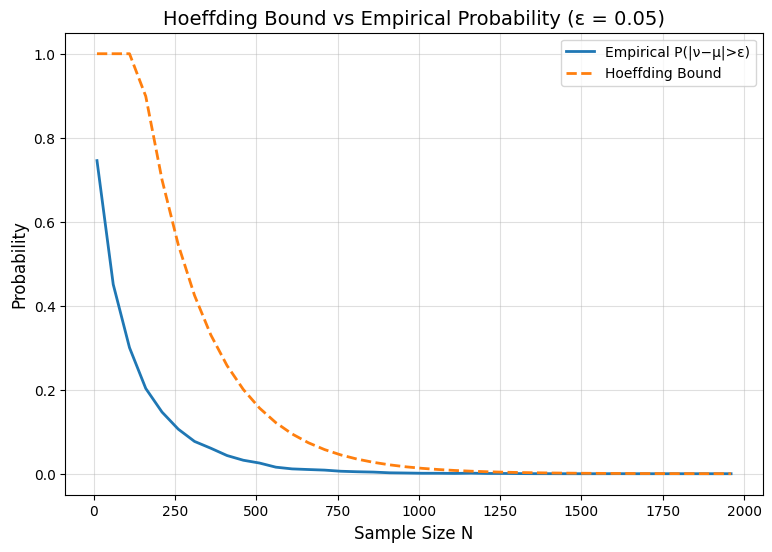

In [ ]:
def plot_hoeffding_vs_empirical(epsilon=0.05, mu=0.5, trials=10000, seed=42):
    np.random.seed(seed)

    N_values = np.arange(10, 2000, 50)
    empirical_probs = []
    bounds = []

    for N in N_values:
        # Generate many experiments: each with N Bernoulli samples
        samples = np.random.binomial(1, mu, size=(trials, N))
        nu = samples.mean(axis=1)

        # Empirical probability of deviation
        p_empirical = np.mean(np.abs(nu - mu) > epsilon)
        empirical_probs.append(p_empirical)

        # Hoeffding bound
        bound = 2 * np.exp(-2 * epsilon**2 * N)
        bounds.append(min(1, bound))  # probabilities capped at 1

    # Plot results
    plt.figure(figsize=(9,6))
    plt.plot(N_values, empirical_probs, label='Empirical P(|ν−μ|>ε)', linewidth=2)
    plt.plot(N_values, bounds, label='Hoeffding Bound', linestyle='--', linewidth=2)
    plt.xlabel('Sample Size N', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title(r'Hoeffding Bound vs Empirical Probability (ε = %.2f)' % epsilon, fontsize=14)
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

# Run the function
plot_hoeffding_vs_empirical(epsilon=0.05)


## Above we see the variation in Hoeffding inequality and sample size N for fixed value of epsilon (0.05). The graph shows us how the hoeffding upper bound is a loose bound for small values of N, but as N grows, it becomes a relatively better upper bound.

## So the hoeffding inequality provides a good estimate of how confident should we be in the results of our experiments given the sample size and error margin.

# **Applying Hoeffing Inequality to Machine Learning**

##The true essence of Hoeffding inequality helps in ML when we're trying to generate predictions using a sample when the population parameters are unknown.

##Let's use the same marble-bin analogy as given in the slides.

##There is a jar full of red and green marbles and we're trying to predict whether the balls we will pick are red or green. So,

##X - bag full of marbles

##x - a marble with unknown color

##f(x) - true color of the marble (red=correct, green=incorrect)

##Hypothesis h(x) - Our prediction of the color

##h(x) = f(x) -  the marble is red

##h(x) != f(x) - marble is green

##In Sample error (Ein) - expected fraction of mistakes the models makes on the training data

##Out of sample error (Eout) - expected fraction of mistakes model makes on the population, which is unknown.

##The hoeffding inequality helps us identify a model whose observed mistakes on training data are a good estimate of its true, expected mistakes on test/unseen data. (Ein ~ Eout)


In [ ]:
def hoeffding_learning_demo(N=100, epsilon=0.05, seed=42):
    """
    Simulates the bin (marble) analogy of machine learning:
      - f(x): true function (red/green marble)
      - h(x): hypothesis (your guess)
      - E_in: error on training sample
      - E_out: true/generalization error
    and demonstrates Hoeffding's inequality:
        P(|E_in - E_out| > ε) ≤ 2 e^{-2ε²N}
    """
    np.random.seed(seed)
    trials = 10000  # number of random experiments
    mu = 0.3        # true error rate (E_out)

    # Simulate training: each trial = N marbles drawn randomly
    # Each marble has a probability 'mu' of being wrong (green)
    samples = np.random.binomial(1, mu, (trials, N))  # 1 = wrong, 0 = correct
    E_in = samples.mean(axis=1)                       # training error per trial
    E_out = mu                                        # true/generalization error

    # Empirical deviation probability
    empirical_prob = np.mean(np.abs(E_in - E_out) > epsilon)

    # Hoeffding bound
    hoeffding_bound = 2 * np.exp(-2 * epsilon**2 * N)

    # Plot histogram of |E_in - E_out|
    plt.figure(figsize=(8,5))
    plt.hist(np.abs(E_in - E_out), bins=50, color='lightblue', edgecolor='gray')
    plt.axvline(epsilon, color='red', linestyle='--', label=r'$\epsilon$ threshold')
    plt.title(r"Generalization via Hoeffding Inequality", fontsize=14)
    plt.xlabel(r"$|E_{in} - E_{out}|$")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

    # Display values
    print(f"True (E_out) = {E_out:.3f}")
    print(f"Sample size N = {N}")
    print(f"Epsilon ε = {epsilon}")
    print(f"Empirical P(|E_in - E_out| > ε) = {empirical_prob:.6f}")
    print(f"Hoeffding Bound = {hoeffding_bound:.6f}")

interact(
    hoeffding_learning_demo,
    N=IntSlider(min=10, max=2000, step=10, value=100, description='N'),
    epsilon=FloatSlider(min=0.01, max=0.2, step=0.01, value=0.05, description='ε'),
    seed=IntSlider(min=0, max=1000, step=1, value=42, description='Seed')
);


interactive(children=(IntSlider(value=100, description='N', max=2000, min=10, step=10), FloatSlider(value=0.05…

## What the above information is telling us is that as N grows, the expected fraction of mistakes the model makes on the sample data will become very close to the true expected mistakes the model would have made on the population/unseen data.

##This leads us to generalization!, where if the difference between Ein and Eout is very small, then we can say that the model generalizes well and can generate accurate predictions.

# **NOTE: The above process happens after the model has been defined and trained, i.e h has been created. We already had the learned hypothesis function and we were simply checking if the in-sample performance was close to the out-of sample performance.**

# But, what if we had multiple hypotheses (or models) and we had to choose one? This is essentially a learning/training setup where we test multiple ML models and have to choose the best one




# **Hoeffding Inequality in a Learning Setup**

##In machine learning, we choose H = {h1​, h2​, ..., h_M​}

##Each ℎ_𝑖 is a possible model or function we could pick — e.g., linear model, decision tree, random forest etc.

##If we were to use the logic as the validation setup and choose h after looking at the data, we would be introducing bias, as the data would have influenced our choice.

##So Hoeffding’s bound for a single ℎ is no longer guaranteed — because the choice of ℎ is not independent of the data.

##So we need a uniform guarantee for all hypotheses in H. This is where the union bound comes into picture, as mentioned in the slides.
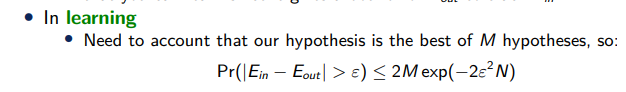

# Setup for this stage


*   ## You have M hypotheses H = {h1, h2, h3, h4, ...., hM}.
*   ## Each h_i has a true mean (true error rate) 𝜇𝑖 drawn randomly from Uniform distribution [0,1]. This means some models are intrinsically “good” (low μ) and others are “bad” (high μ).
*   ## For each hypothesis, generate 𝑁 Bernoulli samples (simulating the model’s observed errors on data).
*   ## Compute Ein(h) for each hypothesis.
*   ## Compute the expected error Eout(h) = 𝜇.
*   ## We compute Ein(h) - Eout(h) for all h.


## **Concept of Bad events**

For each hypothesis, there are certain "Bad events"

Intuitive definition of Bad events = an event where our estimate of in sample erorr deviates too far from the out of sample error, with the difference being more than epsilon.


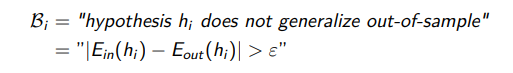

## Each model will have its own bad event - B1, B2, B3, ...BM.
## The union of all bad events is the situation where any model fails the bound.

## We can then calculate the empirical probability  of the union of all bad event

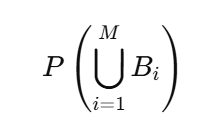

## So, we can write


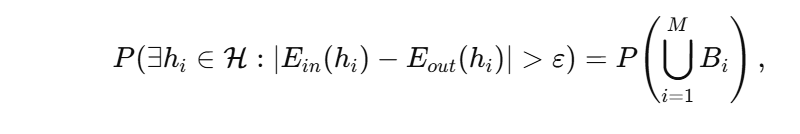

## **An important assumption of this case is that all bad events are considered to be disjoint/independent.**

## So the union probability can be written as below


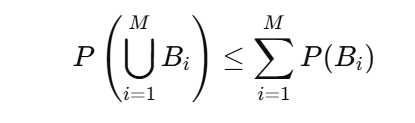

## Now, we already know the bound in the case of a single model, which is given as below

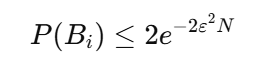

## **So, since the probability of each bad event is given as above, when we're doing it for M bad events/hypotheses, the union bound estimate adds an M term on RHS and becomes -**

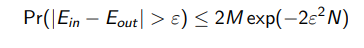



## Below is an interactive visual showing how Hoeffding works when we have multiple hypothesis to choose from

In [ ]:
def hoeffding_learning_many(M=10, N=100, epsilon=0.05, seed=42):
    np.random.seed(seed)

    trials = 5000               # Number of independent experiments -
    mu_true = 0.3               # True out-of-sample error for all hypotheses

    # Step 1: Generate M hypotheses (each with random fluctuations)
    # Each hypothesis h_i has in-sample errors E_in_i from sampling N points
    # Each trial: generate M×N samples, compute mean per hypothesis
    samples = np.random.binomial(1, mu_true, size=(trials, M, N))
    E_in = samples.mean(axis=2)
    E_out = mu_true

    # Step 2: Choose the hypothesis/model with the smallest in-sample error (best fit on training)
    best_index = np.argmin(E_in, axis=1)
    E_in_best = E_in[np.arange(trials), best_index]

    # Step 3: True out-of-sample performance (identical mu_true)
    E_out_best = E_out  # All h_i have same true expectation

    # Step 4: Compute empirical deviation probability
    empirical_prob = np.mean(np.abs(E_in_best - E_out_best) > epsilon) #proportion of good events out of all events

    # Step 5: Compute Hoeffding bound for M hypotheses (by union bound)
    bound = 2 * M * np.exp(-2 * epsilon**2 * N)
    bound = min(1, bound)  # probabilities capped at 1

    # Plot histogram of deviations for the best hypothesis based on Ein(h)
    plt.figure(figsize=(8,5))
    plt.hist(np.abs(E_in_best - E_out_best), bins=40, color='skyblue', edgecolor='gray', alpha=0.7)
    plt.axvline(epsilon, color='red', linestyle='--', label=r'$\epsilon$ threshold')
    plt.title(f'Hoeffding Inequality in Learning Setup (M={M}, N={N})')
    plt.xlabel(r'$|E_{in}(h^*) - E_{out}(h^*)|$')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

    # Print results
    print(f"Number of hypotheses (M): {M}")
    print(f"Sample size per hypothesis (N): {N}")
    print(f"ε = {epsilon}")
    print(f"Empirical P(|E_in(h*) - E_out(h*)| > ε) = {empirical_prob:.6f}")
    print(f"Theoretical bound (2M e^(-2ε²N)) = {bound:.6f}")

# Interactive demo
interact(hoeffding_learning_many,
         M=IntSlider(min=1, max=100, step=1, value=10, description='M'),
         N=IntSlider(min=10, max=1000, step=10, value=100, description='N'),
         epsilon=FloatSlider(min=0.01, max=0.5, step=0.01, value=0.05, description='ε'),
         seed=IntSlider(min=0, max=1000, step=1, value=42, description='Seed'));


interactive(children=(IntSlider(value=10, description='M', min=1), IntSlider(value=100, description='N', max=1…

## The Empirical probability tells us the probability that a bad event happened.

## The Hoeffding theoretical bound tells us the maximum allowed probability (worst-case upper bound) that such bad events could happen, no matter what the data looks like.

# **Why we care about the union bound and how it gets weak**

## The union bound assumes these bad events are independent or disjoint.

##**But,** in reality all models use the same data sample. So, when noise makes one model look bad or lucky, many others do too. **Hence, bad events are extremely overlapping because bad hypotheses are extremely similar**


## **Conclusion**: That’s why the union bound (which just adds up their probabilities) overestimates the true chance that “any” model fails. it is a very loose, pessimistic bound.

In [ ]:
# ==========================================
#  When Hoeffding's Union Bound Becomes Weak
# ==========================================

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
import seaborn as sns

def hoeffding_union_overlap(M=10, N=100, epsilon=0.05, seed=42):
    np.random.seed(seed)
    trials = 2000  # Number of independent experiments

    # Draw true means for each hypothesis from Uniform[0,1]
    mu = np.random.uniform(0, 1, M)

    # Simulate E_in for each trial (Binomial sampling for each h_i)
    # shape: (trials, M)
    samples = np.random.binomial(N, mu, size=(trials, M)) / N
    E_in = samples
    E_out = mu

    # Identify "bad events" B_i = {|E_in - E_out| > ε}
    bad_events = np.abs(E_in - E_out) > epsilon   # shape (trials, M)

    # Empirical probability of each individual B_i
    p_Bi = bad_events.mean(axis=0)

    # Probability of the union event (any bad hypothesis in a trial)
    p_union = np.mean(np.any(bad_events, axis=1))

    # Theoretical Hoeffding bound for one and for union
    single_bound = 2 * np.exp(-2 * epsilon**2 * N)
    union_bound = min(1, 2 * M * np.exp(-2 * epsilon**2 * N))

    fig, axes = plt.subplots(2, 2, figsize=(12,9))
    fig.suptitle(f"Hoeffding’s Inequality with M={M}, N={N}, ε={epsilon}", fontsize=15)

    # --- (1) Distribution of E_in - E_out across all hypotheses ---
    sns.histplot((E_in - E_out).flatten(), bins=50, ax=axes[0,0], color='skyblue', kde=True)
    axes[0,0].axvline(epsilon, color='red', linestyle='--', label='+ε')
    axes[0,0].axvline(-epsilon, color='red', linestyle='--', label='-ε')
    axes[0,0].set_title("Distribution of (E_in - E_out)")
    axes[0,0].legend()
    axes[0,0].grid(alpha=0.3)

    # --- (2) Individual vs Union probabilities ---
    axes[0,1].bar(np.arange(1, M+1), p_Bi, color='lightcoral', label='Empirical P(B_i)')
    axes[0,1].axhline(p_union, color='blue', linestyle='--', label='Empirical P(Union)')
    axes[0,1].axhline(union_bound, color='green', linestyle=':', label='Union Bound (2M e^{-2ε²N})')
    axes[0,1].set_title("Empirical vs Theoretical Probabilities")
    axes[0,1].set_xlabel("Hypothesis Index")
    axes[0,1].set_ylabel("Probability")
    axes[0,1].legend()
    axes[0,1].grid(alpha=0.3)

    # --- (3) Heatmap of overlapping bad events ---
    overlap_matrix = bad_events[:50, :].astype(int)  # first 50 trials for visualization
    sns.heatmap(overlap_matrix, cmap="Reds", cbar=False, ax=axes[1,0])
    axes[1,0].set_title("Overlapping Bad Events B_i across Trials (Dark Red = Violation)")
    axes[1,0].set_xlabel("Hypothesis")
    axes[1,0].set_ylabel("Trial")

    # --- (4) How the bound diverges with M ---
    M_values = np.arange(1, 100, 5)
    empirical_union_probs = []
    bounds = []

    for m in M_values:
        mu_tmp = np.random.uniform(0, 1, m)
        samples_tmp = np.random.binomial(N, mu_tmp, size=(trials, m)) / N
        bad_tmp = np.abs(samples_tmp - mu_tmp) > epsilon
        empirical_union_probs.append(np.mean(np.any(bad_tmp, axis=1)))
        bounds.append(min(1, 2 * m * np.exp(-2 * epsilon**2 * N)))

    axes[1,1].plot(M_values, empirical_union_probs, 'o-', label='Empirical Union Prob')
    axes[1,1].plot(M_values, bounds, 'r--', label='Union Bound')
    axes[1,1].set_title("Bound vs Empirical Probability as M Increases")
    axes[1,1].set_xlabel("Number of Hypotheses (M)")
    axes[1,1].set_ylabel("Probability")
    axes[1,1].legend()
    axes[1,1].grid(alpha=0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    print(f"Empirical average P(B_i): {np.mean(p_Bi):.4f}")
    print(f"Empirical union P(∪ B_i): {p_union:.4f}")
    print(f"Theoretical Hoeffding union bound: {union_bound:.4f}")
    print(f"Sum of individual P(B_i): {p_Bi.sum():.4f}")
# Interactive controls
interact(hoeffding_union_overlap,
         M=IntSlider(min=2, max=100, step=2, value=10, description='M'),
         N=IntSlider(min=10, max=300, step=10, value=100, description='N'),
         epsilon=FloatSlider(min=0.01, max=0.2, step=0.01, value=0.05, description='ε'),
         seed=IntSlider(min=0, max=1000, step=1, value=42, description='Seed'));


interactive(children=(IntSlider(value=10, description='M', min=2, step=2), IntSlider(value=100, description='N…

## **Histogram Plot Analysis**


*   ## The red dashed lines at ±ε mark the tolerance region.
*   ## Any samples falling outside those lines are bad events.
*   ## Bad events are rare tails in this distribution.
*   ## But when we have many models, we’re effectively sampling these tails multiple times — so even if each tail is small, with many hypotheses one is likely to land there. That’s the start of the union-bound problem.


## **Bar Chart Analysis**

*   ## Each red bar = empirical probability 𝑃(𝐵𝑖) for one model ℎ𝑖.
*   ## The blue dashed line = empirical probability that any model fails (the union 𝑃(∪𝐵𝑖).
*   ## The green dotted line = theoretical Heoffding union bound.

## Each individual model ℎ𝑖 has a small chance (~a few %) of deviating (its own bad event). The empirical union probability (blue) is not M times larger, rather it grows slowly. But the union bound (green) grows linearly with M, quickly exceeding the true value.

## This shows that the union bound adds up probabilities as if the bad events were independent. And that in reality, bad events overlap, and many models deviate together because of shared data noise. Therefore, the true chance that any model is bad (blue) is much smaller than the sum of all individual ones (green bound).

## **This shows why the union bound is very loose**

## **Heatmap Analysis**
*   ## When one hypothesis violates the bound (red), many others do at the same time.
*   ## This happens because the same dataset was noisy or biased in that trial, affecting all models.

## **Therefore, adding their probabilities (as in the union bound) double- or triple-counts the same scenarios.**

## **Line Chart Analysis**
*  ## The empirical curve rises slowly (saturates after some point).
*  ## The union bound curve rises linearly, eventually even exceeding 1 as M grows.
*  ## For few hypotheses, the bound is reasonable.
*  ## For many hypotheses, it becomes meaningless (bound > 1).








# **How to Choose the Best Hypothesis Safely**


## 1. Minimize 𝐸𝑖𝑛(ℎ)(training error) - Select the model that performs best on your sample.
## 2. Control model complexity 𝑀 - If 𝑀 is huge (many flexible hypotheses), the bound becomes large, increasing overfitting risk.
## 3. Increase sample size 𝑁 - Larger training data reduces the deviation exponentially.


# **Key Insights** (decide to keep or not)

##1. For small M, Hoeffding’s bound is tight — the chosen ℎ∗ generalizes well.
##2. As M grows, the bound gets looser — there’s a higher probability that one model appears “too good” on training data.
##3. Increasing N (sample size) tightens the bound exponentially — more data offsets the risk of overfitting.
